# Decision Tree Implementation
A Decision Tree is a popular supervised machine learning algorithm used for both classification and regression tasks. It works like a flowchart or a tree structure, where:  
- Each internal node represents a decision based on a feature (e.g., "Is age > 18?")
- Each branch represents the outcome of the decision (yes or no)
- Each leaf node represents a final outcome or class label (e.g., "Approved" or "Not Approved")

In [1]:
## importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  

We are going to work on Iris Dataset for Implementing the Decision Tree.

In [12]:
## importing the dataset
from sklearn.datasets import load_iris
data = load_iris()

In [17]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

So based on the array "data", we have to predict the "target_names".

In [18]:
## Description of the Dataset
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [20]:
## Creating the dependent and independent features
### All the lengths are in centimeters
X = pd.DataFrame(data['data'], columns=["sepal length", "sepal width", "petal length", "petal width"])

In [22]:
y = pd.DataFrame(data["target"])

In [23]:
## train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
## Applying DT Classifier
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()

In [27]:
## training the model
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
## predicting 
y_pred = treeClassifier.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

## printing the result
print("confusion_matrix\n", cm)
print("classification_report \n", classification_report)

confusion_matrix
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0

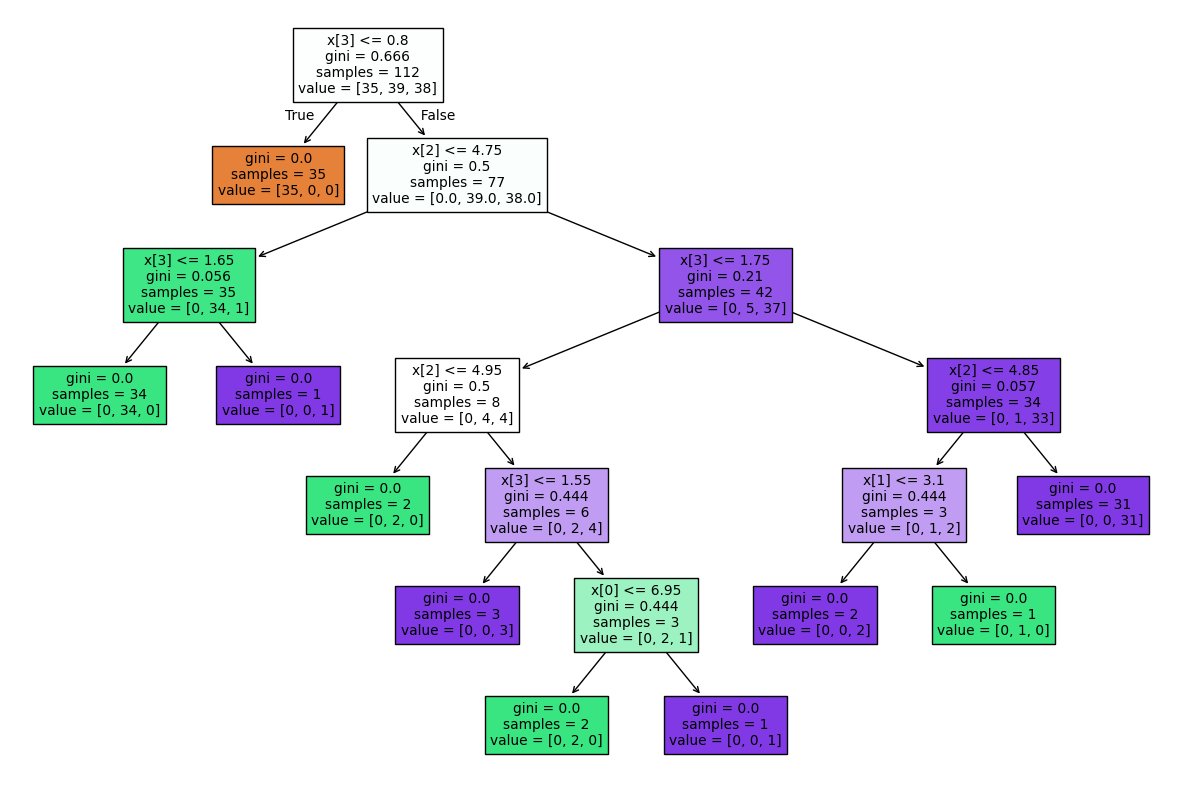

In [31]:
## visualizing the Decision Tree
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treeClassifier, filled = True)

When we create a Decision Tree, most of the time it leads to Overfitting. Because we are creating the DT to its depth.  

### Post Prunning the Decision Tree

In [35]:
## Post Prunning the Decision Tree
post_prun_treeClassifier = DecisionTreeClassifier(max_depth=3)

In [38]:
## training the model
post_prun_treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

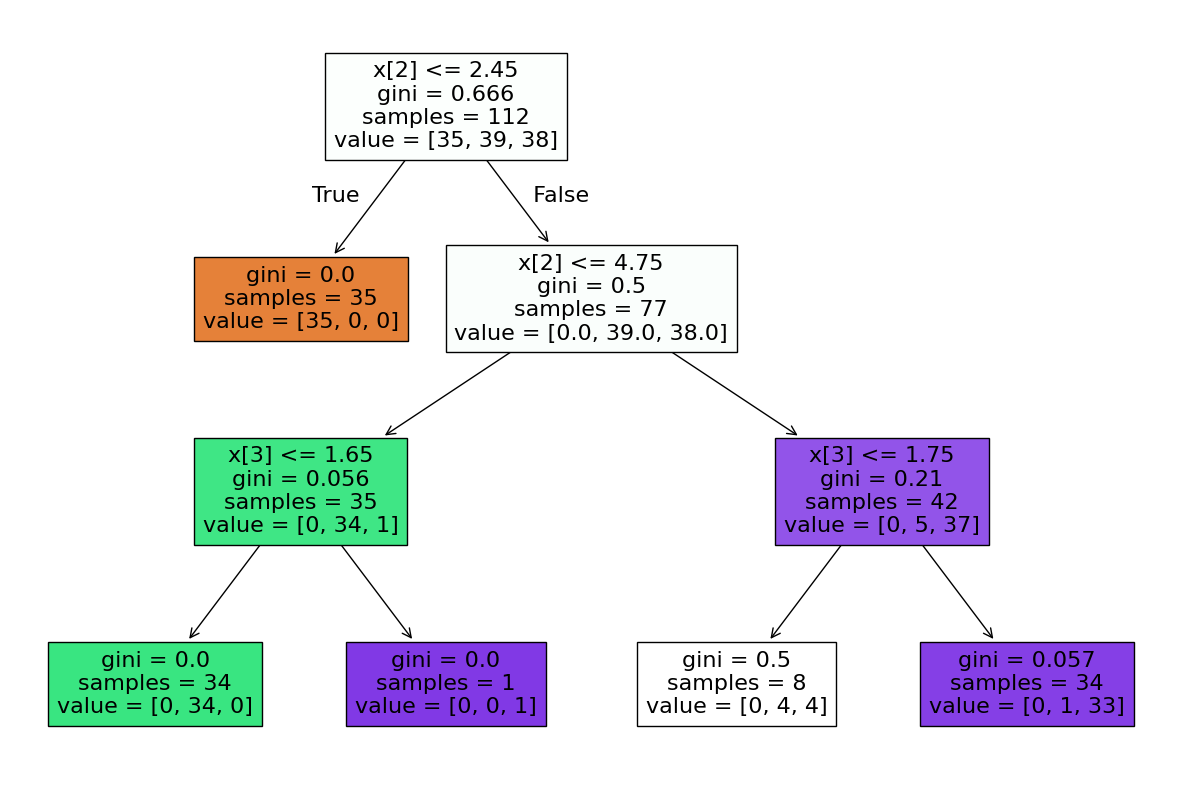

In [39]:
## visualizing the Decision Tree
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(post_prun_treeClassifier, filled = True)

In [40]:
## making predictions
y_pred = post_prun_treeClassifier.predict(X_test)

In [45]:
## checking the performance of the model
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

## printing the result
print("confusion_matrix\n", cm)
print("classification_report \n", classification_report)

confusion_matrix
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

